In [74]:
import os
print(os.listdir('../input/caltech101-airplanes-motorbikes-schooners/caltech101_classification'))


#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#importing sklearn libraries and its dependencies
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#importing tensorflow libraries and kera dependencies
import tensorflow
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

#COnfiguration
# Putting matplotlib to inline and setting the style
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

from keras.preprocessing.image import ImageDataGenerator

# libraries needed for CNN model
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import tensorflow as tf
import random as rn

import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image


import time 


['airplanes', 'Motorbikes', 'schooner']


In [75]:
X=[]
Z=[]
IMG_SIZE=256
Motorbikes_class='../input/caltech101-airplanes-motorbikes-schooners/caltech101_classification/Motorbikes'

Airplanes_class='../input/caltech101-airplanes-motorbikes-schooners/caltech101_classification/airplanes'

Schooner_class='../input/caltech101-airplanes-motorbikes-schooners/caltech101_classification/schooner'

def Label(img,Type_of_vehicle):
    return Type_of_vehicle

In [76]:
#Function to make the training data for each class of motorbike, aeroplane and schooner

def training_data(Type_of_vehicle,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=Label(img,Type_of_vehicle)            #label for each class
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))     #Image resizing for proper traning
        
        X.append(np.array(img))
        Z.append(str(label))
        
#Creating the training data        

training_data('Motorbikes',Motorbikes_class)
training_data('Airplanes',Airplanes_class)
training_data('Schooner',Schooner_class)



100%|██████████| 63/63 [00:00<00:00, 438.81it/s]


In [77]:
#Running the encoder

le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

In [78]:
#Splitting it in train data and test data

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [79]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [80]:
#TEST CASE 1
#Creating the CNN model and mentioning all parameters

model = Sequential()
#1st layer
model.add(Conv2D(filters = 32, kernel_size = (3,3),activation ='relu', input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))


#2nd layer
model.add(Conv2D(filters = 64, kernel_size = (3,3),activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

 
#3rd layer
model.add(Conv2D(filters =64, kernel_size = (3,3),activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [81]:
#Defining batch size and epochs

batch_size=80
epochs=3

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [82]:
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,  
        featurewise_std_normalization=False,
        samplewise_std_normalization=False, 
        zca_whitening=False,  # Applying ZCA whitening
        rotation_range=10,  # Rotating 0 to 180 degree
        zoom_range = 0.1, # To Zoom Images 
        width_shift_range=0.2,  #Hirozontal shift
        height_shift_range=0.2,  #Vertical shift
        horizontal_flip=True,  #Horizontal flip
        vertical_flip=False)  #Vertical Flip

datagen.fit(x_train)

In [83]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [84]:
#Provide summary for better understanding round to nearest 2 values
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 57600)            

In [85]:
#Making the prediction using the training data

Predictions = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test))

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/3
16/16 [==============================] - 61s 4s/step - loss: 2.7231 - accuracy: 0.5325 - val_loss: 0.7476 - val_accuracy: 0.7596
Epoch 2/3
16/16 [==============================] - 60s 4s/step - loss: 0.6094 - accuracy: 0.7663 - val_loss: 0.3821 - val_accuracy: 0.8630
Epoch 3/3
16/16 [==============================] - 60s 4s/step - loss: 0.3154 - accuracy: 0.8924 - val_loss: 0.2517 - val_accuracy: 0.9303


In [86]:
#Printing accuracy
test_acc1=model.evaluate(x_test, y_test)[1]*100
print("The test 1 accuracy: {0:.2f}%".format(test_acc1))

13/13 [==============================] - 3s 248ms/step - loss: 0.2517 - accuracy: 0.9303
The test 1 accuracy: 93.03%


In [87]:
#TEST CASE 2
#Creating the CNN model and mentioning all parameters

model = Sequential()

#1st layer
model.add(Conv2D(filters = 32, kernel_size = (3,3),activation ='relu',input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

 
#2nd layer
model.add(Conv2D(filters =64, kernel_size = (3,3),activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


#3rd layer
model.add(Conv2D(filters =128, kernel_size = (3,3),activation ='softmax'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [88]:
#Defining the batch size and the epochs

batch_size=80
epochs=5

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [89]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False, 
        zca_whitening=False,  # Applying ZCA whitening
        rotation_range=10,  # Rotating 0 to 180 degree
        zoom_range = 0.1, # To Zoom Images 
        width_shift_range=0.2,  #Hirozontal shift
        height_shift_range=0.2,  #Vertical shift
        horizontal_flip=True,  #Horizontal flip
        vertical_flip=False)  #Vertical Flip

datagen.fit(x_train)

In [90]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [91]:
#Provide summary for better understanding round to nearest 2 values
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 30, 30, 128)       0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 115200)           

In [92]:
#Making the prediction using the training data

Predictions = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test))

Epoch 1/5
16/16 [==============================] - 73s 4s/step - loss: 1.1470 - accuracy: 0.4964 - val_loss: 0.8807 - val_accuracy: 0.4952
Epoch 2/5
16/16 [==============================] - 71s 4s/step - loss: 0.8884 - accuracy: 0.5133 - val_loss: 0.7665 - val_accuracy: 0.6755
Epoch 3/5
16/16 [==============================] - 73s 4s/step - loss: 0.6373 - accuracy: 0.7390 - val_loss: 0.5432 - val_accuracy: 0.8077
Epoch 4/5
16/16 [==============================] - 71s 4s/step - loss: 0.5206 - accuracy: 0.8145 - val_loss: 0.4492 - val_accuracy: 0.8173
Epoch 5/5
16/16 [==============================] - 72s 4s/step - loss: 0.4494 - accuracy: 0.8345 - val_loss: 0.4698 - val_accuracy: 0.8293


In [93]:
#Printing accuracy
test_acc2=model.evaluate(x_test, y_test)[1]*100
print("The test 2 accuracy: {0:.2f}%".format(test_acc2))



13/13 [==============================] - 5s 349ms/step - loss: 0.4698 - accuracy: 0.8293
The test 2 accuracy: 82.93%


In [94]:
#TEST CASE 3
#Creating the CNN model and mentioning all parameters

model = Sequential()
#1st layer
model.add(Conv2D(filters = 32, kernel_size = (5,5),activation ='relu', input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

#2nd layer
model.add(Conv2D(filters = 64, kernel_size = (3,3),activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#3rd layer
model.add(Conv2D(filters =128, kernel_size = (3,3),activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#4th layer
model.add(Conv2D(filters =256, kernel_size = (3,3),activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#5th layer
model.add(Conv2D(filters =512, kernel_size = (3,3),activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [95]:
#Defining the batch size and the epochs

batch_size=100
epochs=10

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [96]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False, 
        zca_whitening=False,  # Applying ZCA whitening
        rotation_range=10,  # Rotating 0 to 180 degree
        zoom_range = 0.1, # To Zoom Images 
        width_shift_range=0.2,  #Hirozontal shift
        height_shift_range=0.2,  #Vertical shift
        horizontal_flip=True,  #Horizontal flip
        vertical_flip=False)  #Vertical Flip


datagen.fit(x_train)

In [97]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [98]:
#Provide summary for better understanding round to nearest 2 values
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 252, 252, 32)      2432      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 124, 124, 64)      18496     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 28, 28, 256)      

In [99]:
#Making the prediction using the training data

Predictions = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test))


Epoch 1/10
13/13 [==============================] - 101s 8s/step - loss: 1.0364 - accuracy: 0.4321 - val_loss: 0.8751 - val_accuracy: 0.4567
Epoch 2/10
13/13 [==============================] - 98s 7s/step - loss: 0.7708 - accuracy: 0.6667 - val_loss: 0.6144 - val_accuracy: 0.8389
Epoch 3/10
13/13 [==============================] - 98s 7s/step - loss: 0.5829 - accuracy: 0.7687 - val_loss: 0.5763 - val_accuracy: 0.7212
Epoch 4/10
13/13 [==============================] - 97s 7s/step - loss: 0.4150 - accuracy: 0.8474 - val_loss: 0.3600 - val_accuracy: 0.8846
Epoch 5/10
13/13 [==============================] - 97s 7s/step - loss: 0.3137 - accuracy: 0.8900 - val_loss: 0.3944 - val_accuracy: 0.8750
Epoch 6/10
13/13 [==============================] - 97s 7s/step - loss: 0.2948 - accuracy: 0.8940 - val_loss: 0.2237 - val_accuracy: 0.9159
Epoch 7/10
13/13 [==============================] - 97s 7s/step - loss: 0.2629 - accuracy: 0.9068 - val_loss: 0.2308 - val_accuracy: 0.9207
Epoch 8/10
13/13 [=

In [100]:
#Printing accuracy
test_acc3=model.evaluate(x_test, y_test)[1]*100
print("The test 3 accuracy: {0:.2f}%".format(test_acc3))


13/13 [==============================] - 7s 544ms/step - loss: 0.1581 - accuracy: 0.9543
The test 3 accuracy: 95.43%


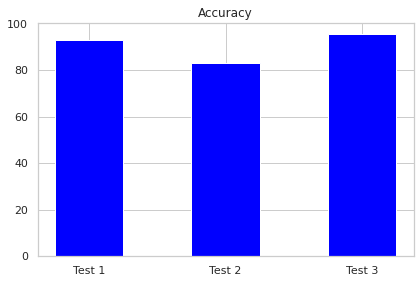

In [103]:
#Making a bar chart for the accuracy of all test cases
float(format(test_acc1))
test_cases=['Test 1','Test 2','Test 3']
test_accuracy=[float(format(test_acc1)),float(format(test_acc2)),float(format(test_acc3))]
plt.bar(test_cases,test_accuracy, color='Blue', align='center', width=0.5)
plt.title('Accuracy')
plt.show()

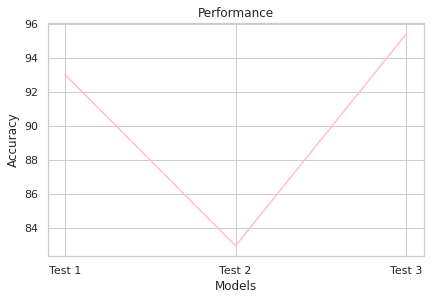

In [104]:
#Making the line chart for the accuracy of all test cases
plt.plot(test_cases, test_accuracy, color ='pink')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Performance")
plt.show()